# Students Performance in Exams
This notebook is an exploratory analysis of a dataset about student performance in math, reading, and writing subjects.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('StudentsPerformance.csv')

## Questions I want to answer

**Are there circumstances related to better or worse performance in exams?**

Every student was not born under the same circumstances. Some may have educated and financially stable parents, while others may be poor enough to be eligible for free lunch, or have parents that have not even finished high school. Some students have also been able to take and complete a test preparation course prior to their examinations.

**Are certain groups of students performing worse than others? If so, why?**

We may see differences in test scores between different groups, such as gender groups or race/ethnic groups. If certain groups score lower than others, we can look into their parental level of education, economic status, and whether or not they completed a test preparation course to see whether the circumstances under which they live bear any relationship to their performance.

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
def convert_to_percentages(df, categories):
  return df[categories].div(df[categories].sum(axis=1), axis=0).multiply(100)

## Student Race/Ethnic Groups

In this dataset, there are 5 groups. Group C is the largest ethnic group, while group A is the smallest. Groups C and D represent over 50% of the students.

Text(0.5, 0.98, 'Student Race/Ethnic Groups')

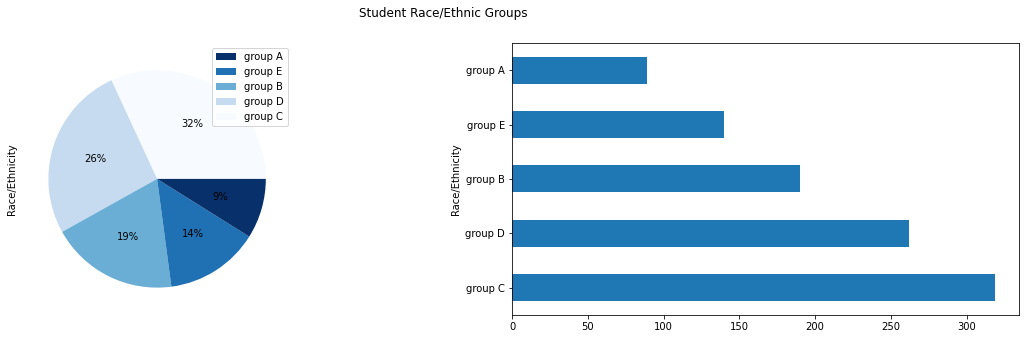

In [ ]:
fig, race_ax = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(20)

df['race/ethnicity'].value_counts().plot.pie(ax=race_ax[0], legend='reverse', labels=None, ylabel='Race/Ethnicity', autopct='%1.0f%%', colormap='Blues', figsize=(20, 20))
df['race/ethnicity'].value_counts().plot.barh(ax=race_ax[1], xlabel='Race/Ethnicity', colormap='tab20', figsize=(20, 5))
fig.suptitle('Student Race/Ethnic Groups')

## Gender Distribution

There is roughly an equal population of female and male students. We can explore whether gender is related to test performance.

## Gender Distribution by Race/Ethnicity

Within each group, gender distribution is more varied. Group A consists mostly of male students.

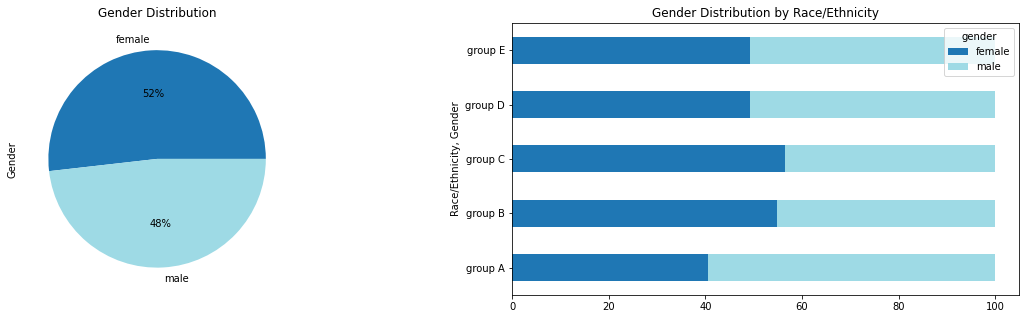

In [ ]:
fig, gender_ax = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(20)

df['gender'].value_counts().plot.pie(ax=gender_ax[0], ylabel='Gender', autopct='%1.0f%%', title="Gender Distribution", colormap='tab20', figsize=(20, 20))
convert_to_percentages(df.groupby('race/ethnicity')['gender'].value_counts().unstack(), ['female', 'male']).plot.barh(ax=gender_ax[1], stacked=True, xlabel='Race/Ethnicity, Gender', title="Gender Distribution by Race/Ethnicity", colormap='tab20', figsize=(20, 5))

## Score Distribution

The test scores appear to be uniform across all three subjects.

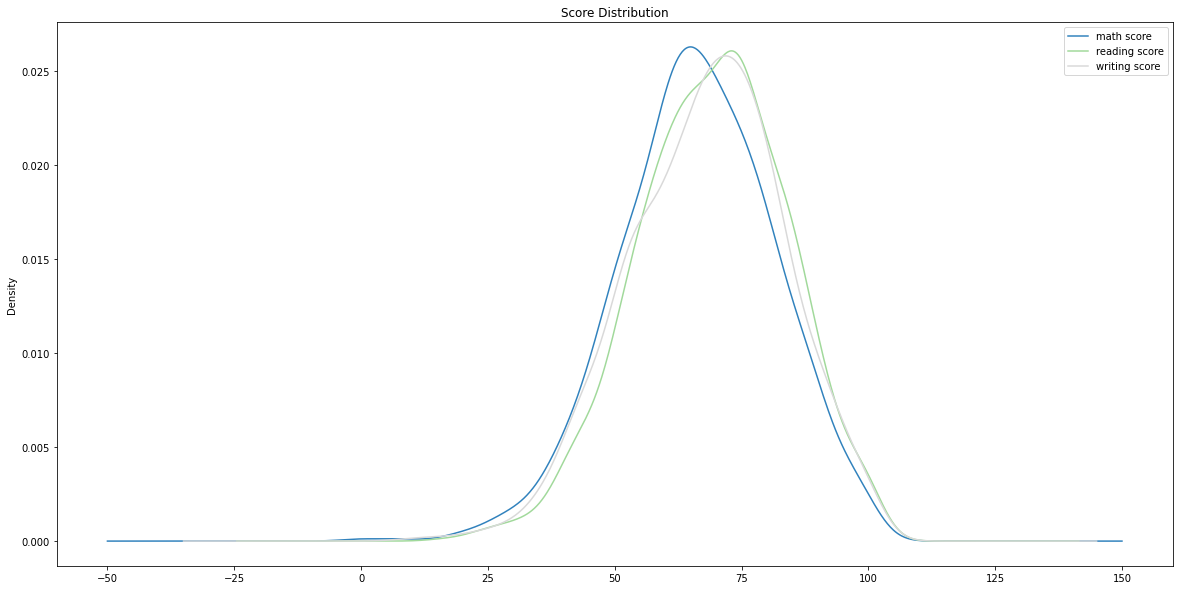

In [ ]:
scores = ['math score', 'reading score', 'writing score']
df[scores].plot.density(title="Score Distribution", colormap='tab20c', figsize=(20, 10))

## Performance Differences Between Genders

Female students are more performant in reading and writing subjects, whereas male students score higher in math tests. Overall, gender does not have a significant impact on mean scores.

Text(0.5, 1.08, 'Test Performance and Gender')

<Figure size 1440x1440 with 0 Axes>

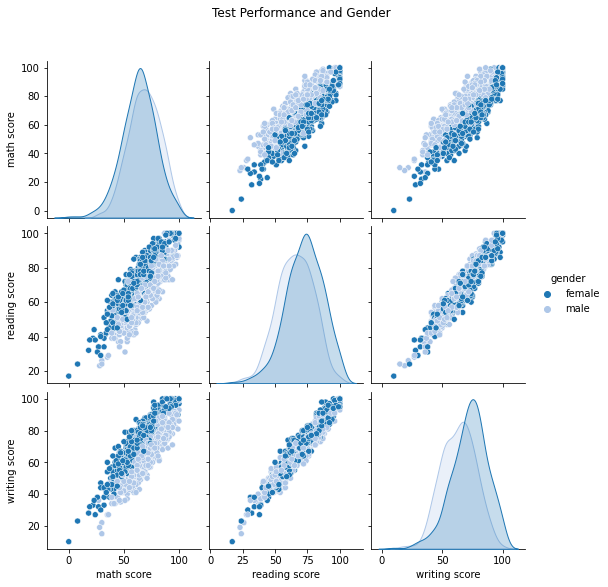

In [ ]:
plt.figure(figsize=(20, 20))  
sns.pairplot(df, hue='gender', palette='tab20')
plt.suptitle('Test Performance and Gender', y=1.08)

## Performance Differences Within Groups

We can see that there are several other factors that seem to have an effect on test performance.

**Race/Ethnicity**

From lowest to highest:

1.   Group A
2.   Group B
3.   Group C
4.   Group D
5.   Group E

Group A has the lowest test scores, and is also the smallest of them all. Test performance and population are not necessarily correlated, however, as Group E has the highest scores while only accounting for 14% of all students.

**Parental Level of Education**

Parental level of education and test performance are fairly positively correlated. Children of parents who have only attended high school scored the lowest, while children of parents who hold master’s degrees scored the highest.

**Economic Status**

The lunch plan in which students are placed depends on their family’s income, so we can assume that those who receive standard-priced lunches have more financially stable parents.

This, too, is positively correlated with test performance. Students who receive free or reduced-price lunches perform worse than those who pay the standard price.

**Test Preparation Course**

As one might expect, students who have completed a test preparation course score higher than those who have not.

Text(0.5, 0.98, 'What Affects the Mean Scores?')

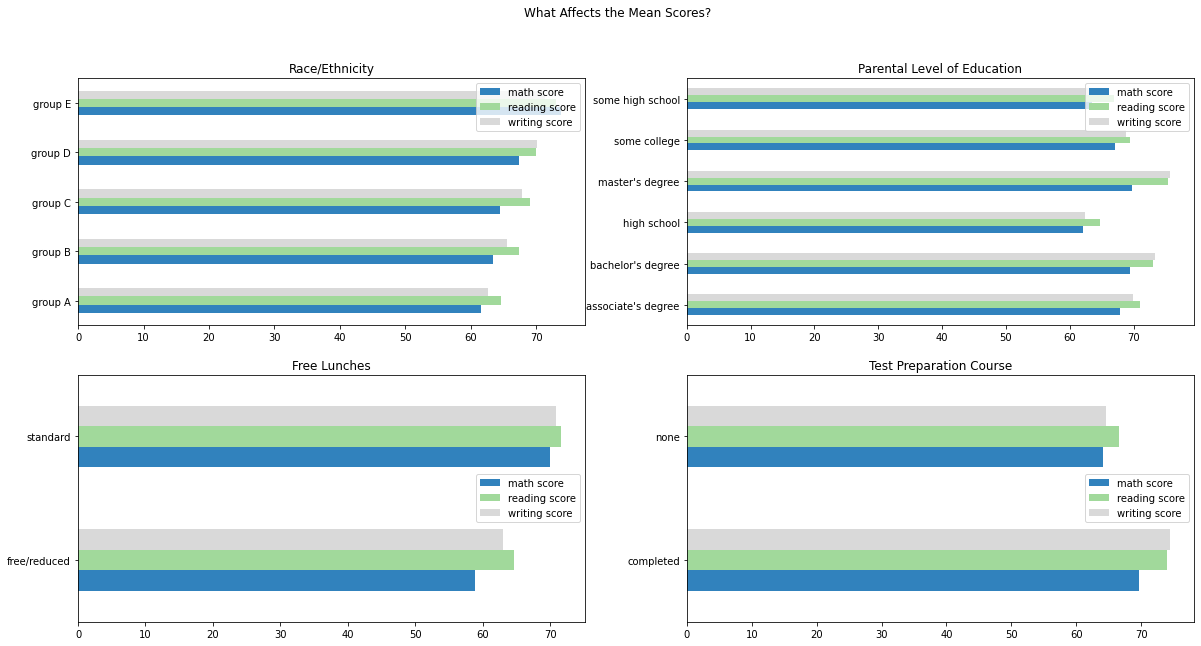

In [ ]:
fig, mean_score_ax = plt.subplots(nrows=2, ncols=2)
fig.set_figwidth(20)

df.groupby('race/ethnicity')[scores].mean().plot.barh(ax=mean_score_ax[0, 0], xlabel='', title='Race/Ethnicity', colormap='tab20c', figsize=(20, 10))
df.groupby('parental level of education')[scores].mean().plot.barh(ax=mean_score_ax[0, 1], xlabel='', title='Parental Level of Education', colormap='tab20c', figsize=(20, 10))
df.groupby('lunch')[scores].mean().plot.barh(ax=mean_score_ax[1, 0], xlabel='', title='Free Lunches', colormap='tab20c', figsize=(20, 10))
df.groupby('test preparation course')[scores].mean().plot.barh(ax=mean_score_ax[1, 1], xlabel='', title='Test Preparation Course', colormap='tab20c', figsize=(20, 10))
fig.suptitle('What Affects the Mean Scores?')

## Test Scores by Grade Letters

The following reference was used to convert score numbers to letter grades:

*   **A+**: 97–100%
*   **A**: 90–96%
*   **B**: 80–89%
*   **C**: 70–79%
*   **D**: 60–69%
*   **F**: 0–59%

We can see that Group A not only has the lowest mean scores, but also the highest percentage of students who scored D or lower.

On the other hand, Group E has both the highest mean scores and the highest percentage of students who scored A or higher.

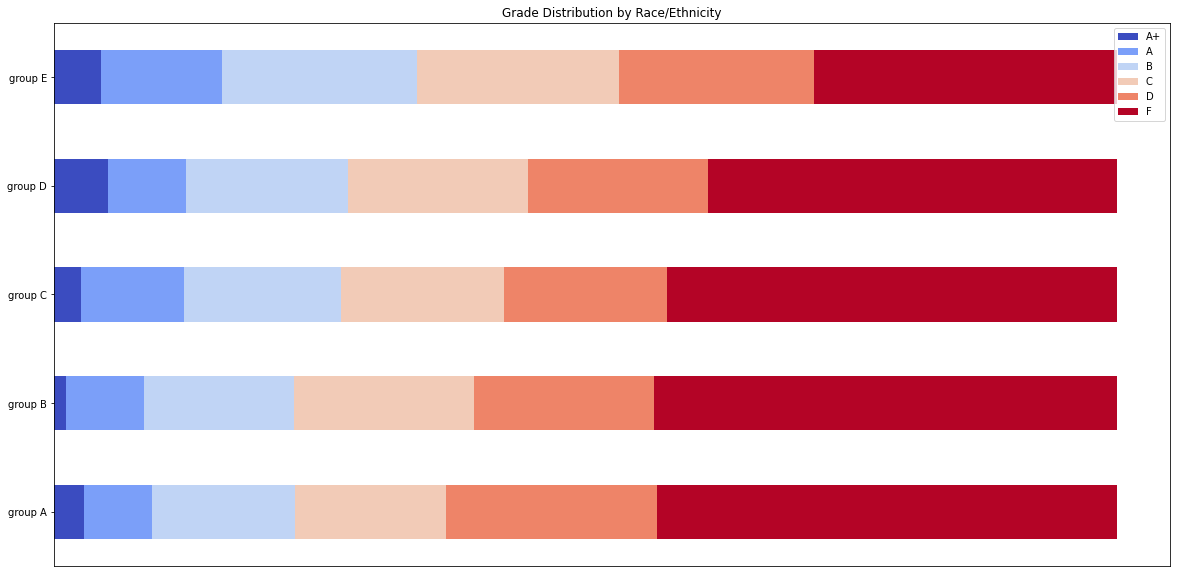

In [ ]:
def make_score_distribution_df(groupby, categories):
  score_list = ['A+', 'A', 'B', 'C', 'D', 'F']

  math_scores = df.groupby(groupby)['math score'].value_counts()
  reading_scores = df.groupby(groupby)['reading score'].value_counts()
  writing_scores = df.groupby(groupby)['writing score'].value_counts()

  def filter_by_grade(score_group, grade_range):
    return list(filter(lambda x: ((x >= grade_range[0]) & (x <= grade_range[1])), list(score_group.index)))

  def count_scores(score_group):
    return {
      'A+': len(filter_by_grade(score_group, (97, 100))),
      'A': len(filter_by_grade(score_group, (90, 96))),
      'B': len(filter_by_grade(score_group, (80, 89))),
      'C': len(filter_by_grade(score_group, (70, 79))),
      'D': len(filter_by_grade(score_group, (60, 69))),
      'F': len(filter_by_grade(score_group, (0, 59)))
    }

  def make_score_df(score_group, array):
    obj = {};
    for i in array:
      obj[i] = count_scores(score_group[i])
    return pd.DataFrame(obj)

  score_df = pd.concat([
                        make_score_df(math_scores, categories),
                        make_score_df(reading_scores, categories),
                        make_score_df(writing_scores, categories)
                        ]).groupby(level=0).sum().reindex(score_list).transpose()

  return convert_to_percentages(score_df, score_list)

race_group = ['group A', 'group B', 'group C', 'group D', 'group E']
race_score_distribution = make_score_distribution_df('race/ethnicity', race_group)
race_score_distribution.plot.barh(title='Grade Distribution by Race/Ethnicity', stacked=True, colormap='coolwarm', figsize=(20, 10)).axes.get_xaxis().set_visible(False)

## Parental Education and Student Performance

The differing scores between students in Groups A to E also bear some relation to the level of education received by their parents.

Group A, the worst performers, has the lowest percentage of parents who have completed college and the highest percentage of parents who have not even completed high school.

Parents of students in Group E, the best performers, are the most educated.

Text(0.5, 0.98, 'Parental Education and Student Performance')

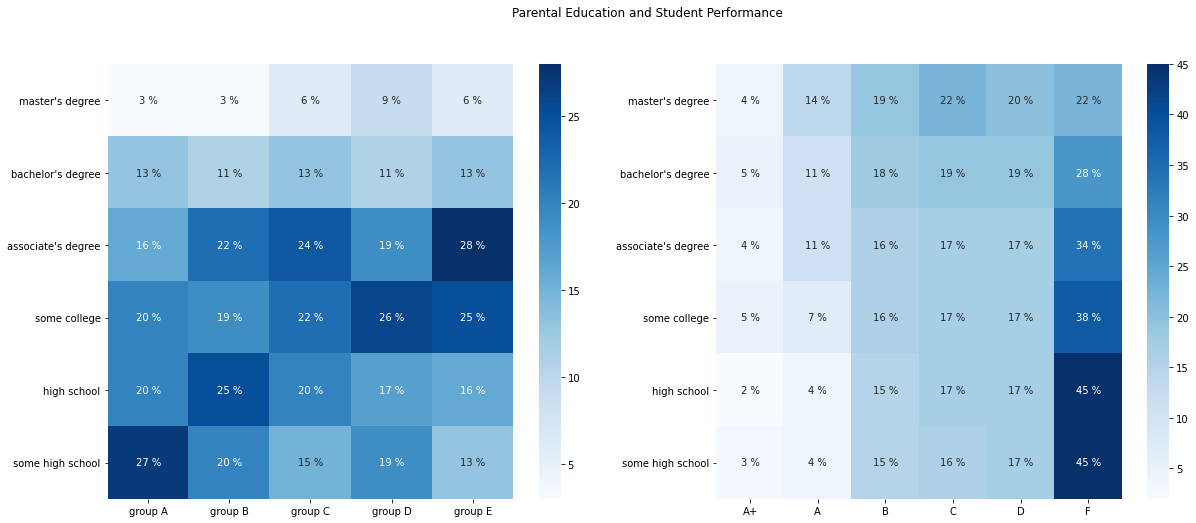

In [ ]:
def make_edu_distribution(groupby, categories):
  education_df = pd.concat(map(lambda x: pd.DataFrame(df.groupby(groupby)['parental level of education'].value_counts()[x]).transpose().rename(index={'parental level of education': x}), categories))
  return convert_to_percentages(education_df, ['master\'s degree', 'bachelor\'s degree', 'associate\'s degree', 'some college', 'high school', 'some high school'])

edu_group = ['master\'s degree', 'bachelor\'s degree', 'associate\'s degree', 'some college', 'high school', 'some high school']
race_education_distribution = make_edu_distribution('race/ethnicity', ['group A', 'group B', 'group C', 'group D', 'group E'])
education_score_distribution = make_score_distribution_df('parental level of education', edu_group)

fig, education_ax = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(20)
fig.set_figheight(8)

race_education_plot = sns.heatmap(data=race_education_distribution.transpose().round(), ax=education_ax[0], annot=True, cmap='Blues')
score_education_plot = sns.heatmap(data=education_score_distribution.round(), ax=education_ax[1], annot=True, cmap='Blues')
for t in race_education_plot.texts: t.set_text(t.get_text() + " %")
for t in score_education_plot.texts: t.set_text(t.get_text() + " %")
plt.suptitle('Parental Education and Student Performance')

## Economic Status and Test Preparation Between Race/Ethnic Groups

The test scores of each group seems to be a sign of their economic status as well. The lower-scoring groups have the highest percentage of students who qualify for free or reduced lunches, while the higher-scoring groups have the highest percentage of students who receive standard lunches.

There is almost a similar relationship between ethic groups and test preparation; however, there is an unusually low percentage of students in Group D who have completed a test prep course even though they have the second-highest mean test scores.

Text(0.5, 0.98, 'Race/Ethnicity in Relation to Economic Status and Test Preparation')

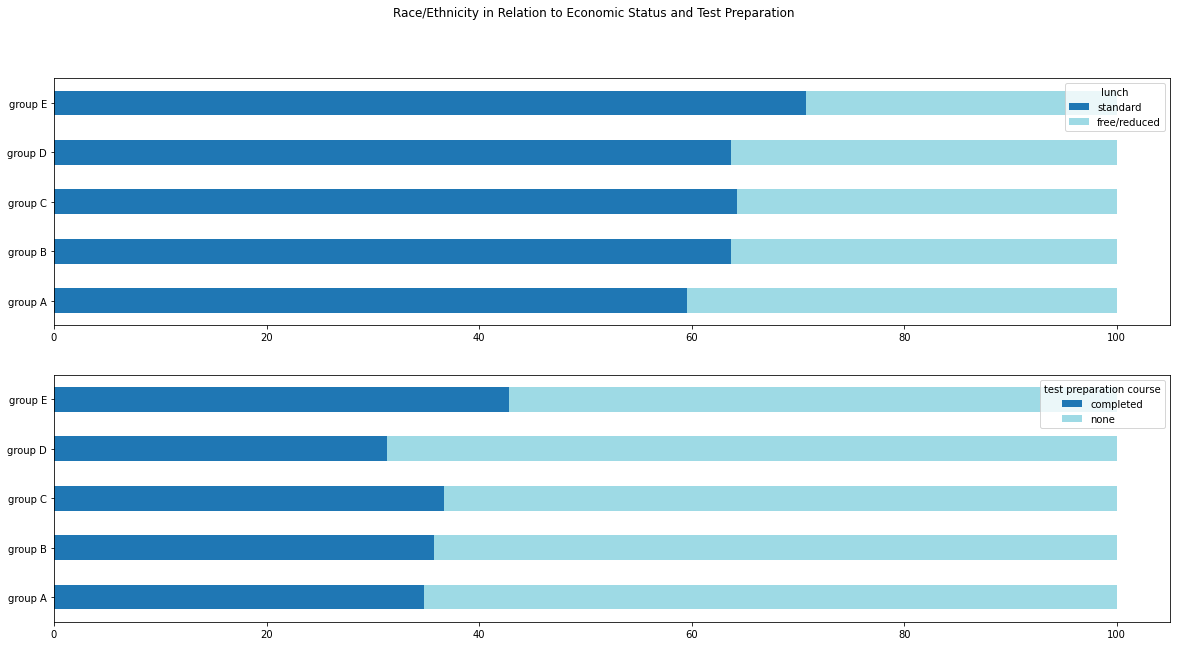

In [ ]:
fig, lunch_test_ax = plt.subplots(nrows=2, ncols=1)
fig.set_figwidth(20)
fig.set_figheight(10)

convert_to_percentages(df.groupby('race/ethnicity')['lunch'].value_counts().unstack(), ['standard', 'free/reduced']).plot.barh(ax=lunch_test_ax[0], stacked=True, colormap='tab20', xlabel='')
convert_to_percentages(df.groupby('race/ethnicity')['test preparation course'].value_counts().unstack(), ['completed', 'none']).plot.barh(ax=lunch_test_ax[1], stacked=True, colormap='tab20', xlabel='')

plt.suptitle('Race/Ethnicity in Relation to Economic Status and Test Preparation')

## Conclusion

There are several factors that are related to test performance. The highest scoring students share one or more of these characteristics:

*   Educated parents
*   Financial stability
*   Completed a test prep course

Gender may contribute to differences in scores across subjects, but there is no significant difference in the overall mean scores.

Students belonging to certain ethnic groups may score better or worse compared to their peers in other groups. The groups that perform the worst tend be disadvantaged in some way—students belonging to the lowest-scoring groups are the poorest and have the least educated parents.